<a href="https://colab.research.google.com/github/MINJI-95236/2024_data-science/blob/main/0611_MNIST_%ED%95%84%EA%B8%B0%EC%B2%B4_%EC%88%AB%EC%9E%90_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras #텐서플로우 라이브러리에서 keras 모듈을 가져온다는 의미입니다./ keras는 딥러닝 모델을 쉽게 구축하고 학습시키기 위한 고수준의 API

# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 전처리: 이미지를 0-1 범위로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# 이미지 데이터 확인
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)
print("Sample training label:", train_labels[0])


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Sample training label: 5


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 이미지를 일렬로 펴주는 레이어
    keras.layers.Dense(128, activation='relu'),  # 뉴런 128개를 가진 레이어
    keras.layers.Dense(10, activation='softmax')  # 0부터 9까지 숫자 중 하나로 판단
])


In [ ]:
# 학습 프로세스 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2544 - accuracy: 0.9275
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0567 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0445 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0212 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.016

In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.0768 - accuracy: 0.9802 - 569ms/epoch - 2ms/step

Test accuracy: 0.9801999926567078


In [ ]:
# 예측 수행
predictions = model.predict(test_images)

# 첫 번째 이미지의 예측 결과 확인
print("Prediction for first test image:", predictions[0])
print("True label for first test image:", test_labels[0])
# 가장 높은 확률을 가진 클래스 출력
import numpy as np
print("Predicted class for first test image:", np.argmax(predictions[0]))


313/313 [==============================] - 1s 2ms/step
Prediction for first test image: [8.0223495e-11 8.3021184e-10 7.2510393e-09 7.8425137e-06 6.5254643e-13
 4.1675902e-10 6.0287427e-16 9.9999207e-01 3.7891138e-11 3.5842245e-08]
True label for first test image: 7
Predicted class for first test image: 7


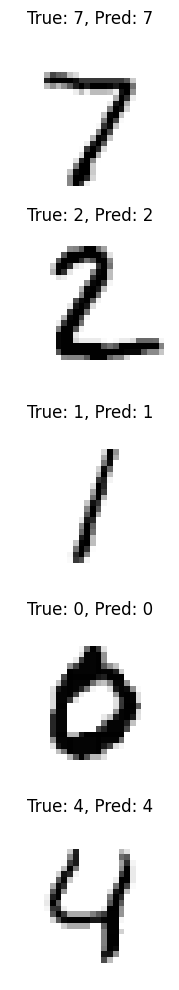

In [ ]:
import matplotlib.pyplot as plt

# 첫 번째 5개 이미지와 예측 결과 시각화
num_images = 5
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 2, 2 * i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary) #test_images[i]를 흑백으로 시각화
    plt.title(f"True: {test_labels[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
